In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Parameters
population_size = 100
string_length = 30
mutation_rate = 0.01
crossover_rate = 0.8
generations = 200

In [3]:
# Initialize population
population = [''.join(random.choice('01') for _ in range(string_length)) for _ in range(population_size)]


In [4]:
def fitness(individual):
    return sum(int(bit) for bit in individual)


In [5]:

def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    selection_probabilities = [fitness / total_fitness for fitness in fitness_values]

    # Select individuals using Roulette Wheel Selection
    selected_indices = random.choices(range(len(population)), weights=selection_probabilities, k=len(population))

    # Return the selected individuals
    selected_population = [population[index] for index in selected_indices]
    return selected_population


In [6]:
def mutate(individual):
    mutated_individual = list(individual)
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] = '1' if individual[i] == '0' else '0'
    return ''.join(mutated_individual)


In [7]:
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2
    else:
        return parent1, parent2


In [8]:
# Main loop
best_fitness_list = []

for generation in range(generations):
    # Calculate fitness for each individual
    fitness_values = [fitness(individual) for individual in population]

    # Calculate best fitness
    best_fitness_list.append(max(fitness_values))
    
    # Select parents based on fitness values using Roulette Wheel Selection
    selected_population = roulette_wheel_selection(population, fitness_values) 

    # Create next generation
    new_population = []
    for i in range(0, len(selected_population), 2):
        parent1, parent2 = selected_population[i], selected_population[i+1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])

    population = new_population


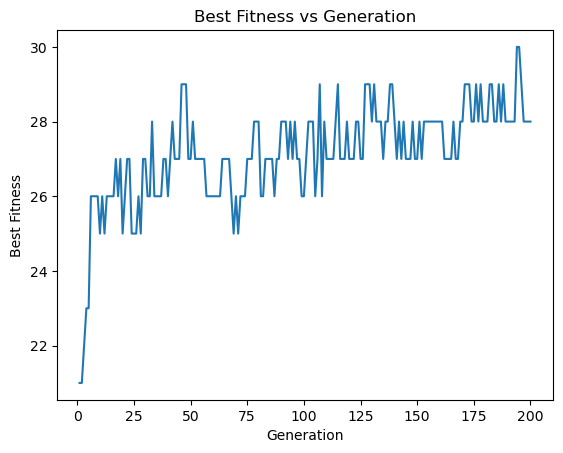

In [9]:
plt.plot(range(1, generations + 1), best_fitness_list)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness vs Generation')
plt.show()
